In [1]:
#pip install nsepy

In [2]:
#pip install yfinance

In [3]:
from Descriptive import Descriptive
obj=Descriptive()

In [4]:

import pandas as pd
from nsepy import get_history as gh
import datetime as dt

stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])

# Filter data for the specified date range

start_date = dt.datetime(2021,6,1)
end_date = dt.datetime(2022,1,5)

stk_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]
#stk_data = gh(symbol= 'Tatacoffee13_21',start=start,end=end)

In [5]:
stk_data

,Date,Open,High,Low,Close
2080,2021-06-01,180.00,181.35,172.65,174.25
2081,2021-06-02,173.55,175.65,172.05,174.00
2082,2021-06-03,176.90,178.70,175.60,176.70
2083,2021-06-04,177.90,177.90,173.75,174.35
2084,2021-06-07,176.40,176.65,173.00,174.35
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [6]:
stk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 2080 to 2224
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    145 non-null    datetime64[ns]
 1   Open    145 non-null    float64       
 2   High    145 non-null    float64       
 3   Low     145 non-null    float64       
 4   Close   145 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.8 KB


In [7]:
low=stk_data["Low"]

In [8]:
dataset=stk_data
quan,qual=obj.segreQuanQual(dataset)

The Quantitative Data: ['Date', 'Open', 'High', 'Low', 'Close']
The Qualtitative Data []


In [9]:
import pandas as pd

class Descriptive:

    def descriptive_Analysis(self, dataset, quantative):
        des_data = pd.DataFrame(index=["Null_count", "NonNull_count", "Total_Count", "Mean", "Median", "Mode", "Std", "Min", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR", "1.5Rule",
                                           "Lesser", "Greater"], columns=quantative)

        for i in quantative:
            series = dataset[i]

            des_data.loc["Null_count", i] = series.isnull().sum()
            des_data.loc["NonNull_count", i] = series.count()
            des_data.loc["Total_Count", i] = len(series)

        # Central Tendency & Dispersion
            des_data.loc["Mean", i] = series.mean()
            des_data.loc["Median", i] = series.median()
            des_data.loc["Mode", i] = series.mode()[0]
            des_data.loc["Std", i] = series.std()  
            des_data.loc["Min", i] = series.min()

        # Quartiles
            des_data.loc["Q1:25%", i] = series.quantile(0.25)
            des_data.loc["Q2:50%", i] = series.quantile(0.50)
            des_data.loc["Q3:75%", i] = series.quantile(0.75)
            des_data.loc["Q4:100%", i] = series.max()

        #IQR and Outlier

            des_data.loc["IQR"] = des_data.loc["Q3:75%"] - des_data.loc["Q1:25%"]
            des_data.loc["1.5Rule"] = 1.5 * des_data.loc["IQR"]
            des_data.loc["Lesser"] = des_data.loc["Q1:25%"] - des_data.loc["1.5Rule"]
            des_data.loc["Greater"] = des_data.loc["Q3:75%"] + des_data.loc["1.5Rule"]

        return des_data
#des_data=obj.descriptive_Analysis(dataset,quan)

In [10]:
print(dataset[quan].dtypes)


Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


In [11]:
descriptive_instance = Descriptive()
des_data = descriptive_instance.descriptive_Analysis(dataset, quan)

In [12]:
des_data

,Date,Open,High,Low,Close
Null_count,0,0,0,0,0
NonNull_count,145,145,145,145,145
Total_Count,145,145,145,145,145
Mean,2021-09-13 03:28:33.103448320,204.356552,208.015862,200.349655,203.678276
Median,2021-09-14 00:00:00,206.45,209.5,203.2,205.55
Mode,2021-06-01 00:00:00,213.0,178.7,196.0,174.35
Std,61 days 20:05:49.113976488,15.34808,15.990167,14.736037,14.927416
Min,2021-06-01 00:00:00,170.05,175.65,168.0,172.9
Q1:25%,2021-07-22 00:00:00,193.0,196.85,189.5,192.45
Q2:50%,2021-09-14 00:00:00,206.45,209.5,203.2,205.55


In [13]:
des_data["Low"]

Null_count                0
NonNull_count           145
Total_Count             145
Mean             200.349655
Median                203.2
Mode                  196.0
Std               14.736037
Min                   168.0
Q1:25%                189.5
Q2:50%                203.2
Q3:75%                210.2
Q4:100%              231.25
IQR                    20.7
1.5Rule               31.05
Lesser               158.45
Greater              241.25
Name: Low, dtype: object

In [14]:
des_data["High"]

Null_count                0
NonNull_count           145
Total_Count             145
Mean             208.015862
Median                209.5
Mode                  178.7
Std               15.990167
Min                  175.65
Q1:25%               196.85
Q2:50%                209.5
Q3:75%                218.0
Q4:100%               254.4
IQR                   21.15
1.5Rule              31.725
Lesser              165.125
Greater             249.725
Name: High, dtype: object

In [15]:
import numpy as np
np.percentile(dataset["Low"],99)

229.964

In [16]:
np.percentile(dataset["High"],80)

219.28

In [17]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

In [18]:
get_pdf_probability(dataset["Low"],175,198)

Mean=200.350, Standard Deviation=14.736
The area between range(175,198):0.38364510341062896


C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.38364510341062896

In [19]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


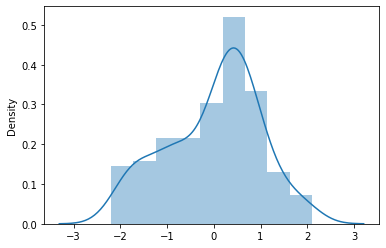

In [20]:
stdNBgraph(dataset["Low"])

In [21]:
def freqTable(columnName,dataset):
    import pandas as pd
    frq=pd.DataFrame()
    frq["Unique_Values"]=dataset[columnName].value_counts().index
    frq["Frequency"]=dataset[columnName].value_counts().values
    frq["Relative_Fre"]=dataset[columnName].value_counts().values/len(dataset[columnName])*100
    frq["Cumulative"]=frq["Relative_Fre"].cumsum()
    return frq

In [22]:
freqTable("Low",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,196.00,3,2.068966,2.068966
1,210.20,2,1.379310,3.448276
2,186.30,2,1.379310,4.827586
3,187.50,2,1.379310,6.206897
4,203.05,2,1.379310,7.586207
...,...,...,...,...
129,207.65,1,0.689655,97.241379
130,207.10,1,0.689655,97.931034
131,205.00,1,0.689655,98.620690
132,206.15,1,0.689655,99.310345


In [23]:
freqTable("High",dataset)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,218.30,2,1.379310,1.379310
1,178.70,2,1.379310,2.758621
2,189.00,2,1.379310,4.137931
3,214.70,2,1.379310,5.517241
4,213.00,2,1.379310,6.896552
...,...,...,...,...
130,216.95,1,0.689655,97.241379
131,213.55,1,0.689655,97.931034
132,215.50,1,0.689655,98.620690
133,219.75,1,0.689655,99.310345


In [24]:
fh=freqTable("High",dataset)

In [25]:
fh.sort_values(by="Frequency",ascending=False)

,Unique_Values,Frequency,Relative_Fre,Cumulative
0,218.30,2,1.379310,1.379310
2,189.00,2,1.379310,4.137931
3,214.70,2,1.379310,5.517241
4,213.00,2,1.379310,6.896552
5,193.95,2,1.379310,8.275862
...,...,...,...,...
45,213.90,1,0.689655,38.620690
44,208.00,1,0.689655,37.931034
43,200.00,1,0.689655,37.241379
42,206.85,1,0.689655,36.551724


In [26]:
fhs=fh[fh["Frequency"]==2]["Unique_Values"].sort_values(ascending=False)
fhs

0    218.30
3    214.70
4    213.00
6    209.50
7    207.80
9    206.00
8    204.05
5    193.95
2    189.00
1    178.70
Name: Unique_Values, dtype: float64